In [1]:
%matplotlib inline

from modsim import *

In [52]:
#using data from http://www.elephantdatabase.org/report/1995/Africa 
#only recorded "definite" statistics

elephant_database = TimeSeries()

elephant_database[1995] = 286.233
elephant_database[1998] = 301.733
elephant_database[2002] = 402.067
elephant_database[2007] = 472.269
elephant_database[2013] = 401.732

##pop_array = (286.233,301.733,402.067,472.269,401.732,352.271)
##year_array = (1995,1998,2002,2007,2013,2014)
       

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


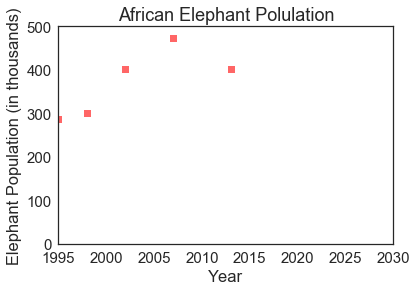

In [70]:
def plot_data(x_start=1995, x_end=2030, y_start=0, y_end=500):
  
    plot(elephant_database, 'rs')
    ylim([y_start,y_end])
    xlim([x_start,x_end])
    decorate(title='African Elephant Polulation', xlabel='Year', ylabel='Elephant Population (in thousands)')

plot_data()

In [66]:
def fit_curve(a=-1.1287, b=28.674, c=262.15,
            year_start=1994, year_end=2100):
    
    #year_start and year_end indicate the years to which the model will apply
    
    
    pop_fit = TimeSeries()
    
    for t in linspace(year_start, year_end, 100):
        pop_fit[t] = a * (t-1995)**2 + b * (t-1995) + c
        
    return pop_fit

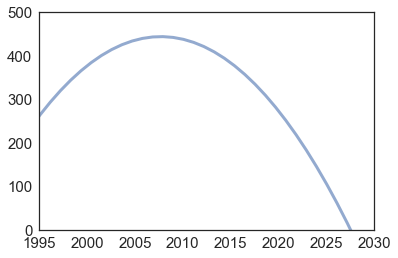

In [67]:
def plot_curve(x_start=1995, x_end=2030, y_start=0, y_end=500):
    
    plot(fit_curve())
    ylim([y_start,y_end])
    xlim([x_start,x_end])
    
plot_curve()

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


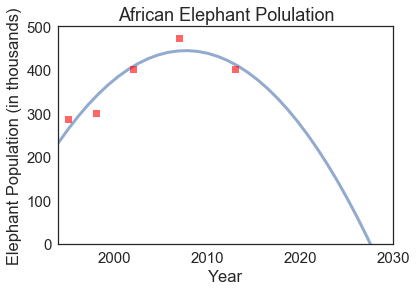

In [68]:
def plot_all(x_start=1994, x_end=2030, y_start=0, y_end=500):
    
    newfig()
    plot_curve(x_start, x_end, y_start, y_end)
    plot_data(x_start, x_end, y_start, y_end)
    
plot_all()